## Homework 5 (Question 5)

For this question, you will write your own implementation of the logistic regression classifier and apply it to a given input dataset. Note that you must write your own functions to perform the classification and avoid using scikit-learn's implementation or any implementation you find online. You are allowed to use the following:

- numpy functions for creating and manipulating ndarrays.
- pandas library for loading and displaying the data.
- scikit-learn library for splitting the data into training/test sets and for model evaluation. You can only use train_test_split(), confusion_matrix(), and accuracy_score() from the library for this homework problem.

If you're unsure whether you can use some function, please email the instructor.

**Step 1:** Download the *heart.csv* file from D2L to your working directory. Load and display the data. Column names are given below.

In [1]:
import pandas as pd

data = pd.read_csv( 'heart.csv',header='infer' )
data.columns = ['age','sex','cp','bp','cholesterol','blood sugar','ecg','heart rate','angina',
               'oldpeak','slope','major vessels','thal','heart attack']
data

,age,sex,cp,bp,cholesterol,blood sugar,ecg,heart rate,angina,oldpeak,slope,major vessels,thal,heart attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**Step 2:** Extract the predictor matrix, X, and a vector of the target attribute y, from the pandas dataframe. Standardize the predictor attributes by subtracting each value with its corresponding column mean and dividing by its corresponding standard deviation. **Note:** Standardization is important especially when the predictors have different range of values. Since this is a classification (not regression) problem, you need to standardize the predictor attributes only. 

In [2]:
y = data['heart attack']
X = data.drop(columns=['heart attack'])

# Standardize the X values

import math
import numpy as np

def myMean(vec):
    col_means = np.zeros(vec.shape[1])
    for col_number in range (vec.shape[1]):
        col_means[col_number] = sum(vec[:,col_number])/len(vec[:,col_number])
    
    return col_means
def myStdDev(vec):
    avg = myMean(vec)
    col_stdevs = np.zeros(vec.shape[1])
    for col_number in range (vec.shape[1]):
        sum_of_square = sum((vec[i,col_number] - avg[col_number])**2 for i in range(vec.shape[0]))
        col_stdevs[col_number] = math.sqrt(sum_of_square/(len(vec[:,col_number])-1))
    return col_stdevs
def calc_Mean_Stdev(arr):
    mean_values = np.zeros( arr.shape[1] )
    stdDev_values = np.zeros( arr.shape[1] )

    mean_values = myMean(arr) 
    stdDev_values = myStdDev(arr)
    
    return(mean_values, stdDev_values)

def standardize(arr):
    avg = myMean(arr)
    stdev = myStdDev(arr)
    standardized_array = arr 
    for col_number in range (arr.shape[1]):
        for i in range(arr.shape[0]):
            standardized_array[i,col_number] = (arr[i,col_number] - avg[col_number])/stdev[col_number]
    return standardized_array

X = standardize(X.values)


print('After standardization:')
pd.DataFrame(X).head()

After standardization:


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.950624,0.679881,1.969864,0.762694,-0.255910,2.390484,-1.004171,0.015417,-0.69548,1.085542,-2.270822,-0.713249,-2.145324
1,-1.912150,0.679881,1.000921,-0.092585,0.072080,-0.416945,0.897478,1.630774,-0.69548,2.119067,-2.270822,-0.713249,-0.512075
2,-1.471723,-1.465992,0.031978,-0.092585,-0.815424,-0.416945,-1.004171,0.975900,-0.69548,0.310399,0.974740,-0.713249,-0.512075
3,0.179877,0.679881,0.031978,-0.662770,-0.198030,-0.416945,0.897478,1.237849,-0.69548,-0.206364,0.974740,-0.713249,-0.512075
4,0.289984,-1.465992,-0.936965,-0.662770,2.078611,-0.416945,0.897478,0.582975,1.43311,-0.378618,0.974740,-0.713249,-0.512075


**Step 3:** Partition the data into training and test sets. Reserve 5% of the data for training and the remaining 95% for testing.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.95, random_state=1)

print('Training set size:', X_train.shape[0])
print('Training class distribution:')
print(pd.Series(Y_train).value_counts(normalize=True))

print('\nTest set size:', X_test.shape[0])
print('Test class distribution:')
print(pd.Series(Y_test).value_counts(normalize=True))

Training set size: 15
Training class distribution:
0    0.6
1    0.4
Name: heart attack, dtype: float64

Test set size: 288
Test class distribution:
1    0.552083
0    0.447917
Name: heart attack, dtype: float64


**Step 4:** You need to write the code for a class named myLogistic that implements the logistic regression classifier. There are 2 functions that must be implemented in this class:
- init() function, which initializes the hyperparameters of the classifier. 
- fit() function, which trains the classifier on some input training data provided by the user using gradient descent and subgradient descent methods.
- predict() function, which applies the classifier to some given input data.

Read carefully the instruction below to implement the class. Pay careful attention to the input arguments and return values of each function. There are 3 different loss functions that must be implemented by your logistic regression classifier:

loss=None:   $\mathcal{L} = \sum_{i=1}^N \bigg[ y_i \log\bigg(1 + e^{-\mathbf{w}^T \mathbf{x}_i - w_0}\bigg )  + (1 - y_i) \log\bigg(1 + e^{\mathbf{w}^T\mathbf{x}_i + w_0}\bigg) \bigg]$

loss='l2':   $\mathcal{L} = \sum_{i=1}^N \bigg[ y_i \log\bigg(1 + e^{-\mathbf{w}^T \mathbf{x}_i - w_0}\bigg )  + (1 - y_i) \log\bigg(1 + e^{\mathbf{w}^T\mathbf{x}_i + w_0}\bigg) \bigg] + C \|\mathbf{w}\|_2^2$

loss='l1':   $\mathcal{L} = \sum_{i=1}^N \bigg[ y_i \log\bigg(1 + e^{-\mathbf{w}^T \mathbf{x}_i - w_0}\bigg )  + (1 - y_i) \log\bigg(1 + e^{\mathbf{w}^T\mathbf{x}_i + w_0}\bigg) \bigg] + C \|\mathbf{w}\|_1$

where $N$ is the size of the training data, $w_0$ is the model intercept, $\mathbf{w}$ is the vector of model coefficients, and $C$ is the regularization parameter.

For loss=None and loss='l2', you need to apply the standard gradient descent algorithm to solve the optimization problem. For loss='l1', you need to apply the subgradient descent algorithm to solve the problem. During training, you need to compute the training loss for every iteration and store them in an array. The training loss is computed as follows: 
$$\textrm{Training loss} = \sum_{i=1}^N \bigg[ \hat{y}_i - y_i\bigg]
= \sum_{i=1}^N \bigg[ \frac{1}{1 + e^{-\mathbf{w}^T\mathbf{x}_i - w_0}} - y_i\bigg],$$
where $\hat{y}_i$ is the predicted posterior probability for data point $x_i$. The training loss will be returned by the fit() function, which you can use to plot the convergence of the algorithm.

In [4]:
import numpy as np

class myLogistic():
    """
    Implementation of logistic regression classifier.
    
    """
    
    def __init__(self, input_dim, loss = None, maxiter = 100, learning_rate = 0.01, C=1.0):
        """"
            Input:  
                input_dim: number of predictor attributes.
                loss: loss function, whose value is either None, 'l1', or 'l2' (default = None).
                maxiter: maximum iteration before the gradient/subgradient descent algorithm terminates (default=100).
                learning_rate: learning rate for gradient/subgradient descent (default = 0.01).
                C: regularization hyperparameter for l1 and l2-regularized logistic regression.

            Output: None            
        """
        self.loss = loss 
        self.maxiter = maxiter
        self.learning_rate = learning_rate
        self.coef = np.zeros( X.shape[1] )          # initialize model coefficients to be a vector of zeros
        self.intercept = 0                   # initialize model intercept to be 0.
        self.C = C                         # regularization parameter
         
    def __sigmoid(self, z):  
        return 1 / (1 + np.exp(-z))  
    
    def fit(self, X, y):
        """"
            Input:  
                X: N x d matrix of predictor attributes, where N is #training points and d is #predictor attributes
                y: N x 1 vector of target attributes, where each value in the vector is either 0 or 1.

            Output: 
                loss: maxiter x 1 vector containing value of the loss function in each iteration
        """    
        
        loss = np.zeros(self.maxiter)                      # initialize the loss to be a vector of zeros
        for i in range(self.maxiter):

            z = np.dot(X, self.coef) + self.intercept
            df_dz = (-y * np.exp(-z)) / (1 + np.exp(-z)) + ((1-y)*np.exp(z))/ (1 + np.exp(z))
            
            if self.loss == 'l2':       # Gradient descent update for l2-regularized logistic regression 
                
                df_dw = np.dot(X.T, df_dz) + 2*self.C*self.coef
                df_db = np.dot(np.ones(X.shape[0]), df_dz) + 2*self.C*self.intercept
                self.coef -= self.learning_rate * df_dw
                self.intercept -= self.learning_rate * df_db
                
                loss[i] =  np.linalg.norm(self.__sigmoid(z) - y)  # loss = P(y=1|x) - actual (sum over all n data points) 
                
            elif self.loss == 'l1':     # Subgradient descent update for l1-regularized logistic regression

                df_dw = np.dot(X.T,df_dz) + self.C*np.sign(self.coef)
                df_db = np.dot(np.ones(X.shape[0]),df_dz) + self.C*np.sign(self.intercept)
                self.coef -= self.learning_rate * df_dw
                self.intercept -= self.learning_rate * df_db
                
                loss[i] =  np.linalg.norm(self.__sigmoid(z) - y)  # loss = P(y=1|x) - actual (sum over all n data points)
                
            else:                       # Gradient descent update for unregularized logistic regression
                
                df_dw = np.dot(X.T, df_dz)
                df_db = np.dot(np.ones(X.shape[0]), df_dz)
                self.coef -= self.learning_rate * df_dw
                self.intercept -= self.learning_rate * df_db
                
                loss[i] =  np.linalg.norm(self.__sigmoid(z) - y)
                
        return loss
                
    def predict(self, X):
        """"
            Input:  
                X: N x d matrix of predictor attributes, where N is #data points and d is #predictor attributes

            Output: 
                Y_pred: N x 1 vector containing the predicted class of each data point (either 0 or 1)
                Y_probs: N x 2 vector containing posterior probabilities of each data point in each of the 2 classes,
                         where Y_probs[:,0] = P(y=0|x) and Y_probs[:,1] = P(y=1|x). 
        """    
        
        z = np.dot(X, self.coef) + self.intercept
        Y_probs = np.column_stack((self.__sigmoid(-z), self.__sigmoid(z)))
        Y_pred = (self.__sigmoid(z)).round()
        
        return (Y_pred, Y_probs)

**Step 5:** Apply the logistic regression model to the training data and evaluate it on the test data. Plot the value of the loss for each iteration to check convergence of the gradient/subgradient descent algorithm.

**(a)** Unregularized logistic regression

Model coefficients: [ 0.8403175  -2.41364541  1.30966054 -2.48465296 -2.19314018 -0.87547159
  0.0676435   1.94629577 -1.24805069 -0.26131881  1.77993365 -0.50717612
  0.52009699]
Model intercept: -0.13048858710443192


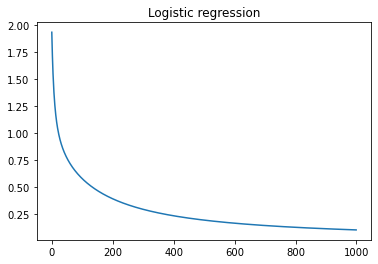

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

model = myLogistic(input_dim = X_train.shape[1], maxiter=1000, loss=None)
losses = model.fit( X_train, Y_train )

plt.plot(losses)
plt.title('Logistic regression')
print('Model coefficients:', model.coef )
print('Model intercept:', model.intercept )

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Model performance on training set:')
Ypred, Y__train_probs = model.predict( X_train )
print('Accuracy:', accuracy_score(Y_train, Ypred)*100, '%')
print(confusion_matrix(Y_train, Ypred))

print('\nModel performance on test set:')
Ypred, Y_test_probs = model.predict( X_test )
print('Accuracy:', accuracy_score(Y_test, Ypred)*100, '%')
print(confusion_matrix(Y_test, Ypred))

Model performance on training set:
Accuracy: 100.0 %
[[9 0]
 [0 6]]

Model performance on test set:
Accuracy: 75.0 %
[[ 95  34]
 [ 38 121]]


**(b)** Logistic regression with 'l2' loss

Model coefficients: [ 0.05856643 -0.33299485  0.32844267 -0.43395867 -0.26045173 -0.27485793
  0.11342607  0.24609241 -0.19496956 -0.22291188  0.31714745 -0.15605594
 -0.0093471 ]
Model intercept: -0.0957317599319496


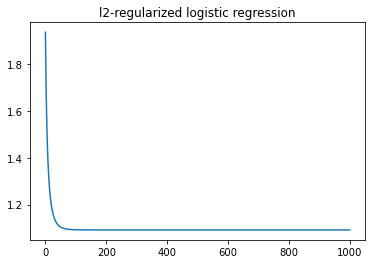

In [7]:
model = myLogistic(input_dim = X_train.shape[1], maxiter=1000, loss= 'l2' , C=2.0)
losses = model.fit( X_train, Y_train )

plt.plot(losses)
plt.title('l2-regularized logistic regression')
print('Model coefficients:', model.coef )
print('Model intercept:', model.intercept )

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Model performance on training set:')
Ypred, Y__train_probs = model.predict( X_train )
print('Accuracy:', accuracy_score(Y_train, Ypred)*100, '%')
print(confusion_matrix(Y_train, Ypred))

print('\nModel performance on test set:')
Ypred, Y_test_probs = model.predict( X_test )
print('Accuracy:', accuracy_score(Y_test, Ypred)*100, '%')
print(confusion_matrix(Y_test, Ypred))

Model performance on training set:
Accuracy: 93.33333333333333 %
[[8 1]
 [0 6]]

Model performance on test set:
Accuracy: 75.34722222222221 %
[[ 99  30]
 [ 41 118]]


**(c)** Logistic regression with l1 loss

Model coefficients: [ 0.00319359 -0.48877095  0.87903452 -0.9462309  -0.10824017 -0.19988558
  0.00245712  0.33123617 -0.10079775 -0.00110695  0.23022253 -0.00963793
  0.00932927]
Model intercept: -0.007890370480880626


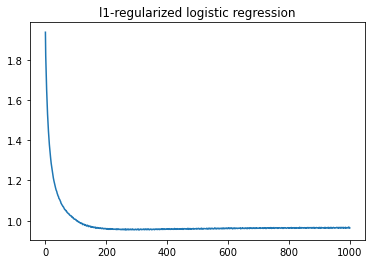

In [9]:
model = myLogistic(input_dim = X_train.shape[1] , maxiter=1000, loss= 'l1' , C=1.0)
losses = model.fit( X_train, Y_train )

plt.plot(losses)
plt.title('l1-regularized logistic regression')
print('Model coefficients:', model.coef )
print('Model intercept:', model.intercept )

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Model performance on training set:')
Ypred, Y__train_probs = model.predict( X_train )
print('Accuracy:', accuracy_score(Y_train, Ypred)*100, '%')
print(confusion_matrix(Y_train, Ypred))

print('\nModel performance on test set:')
Ypred, Y_test_probs = model.predict( X_test )
print('Accuracy:', accuracy_score(Y_test, Ypred)*100, '%')
print(confusion_matrix(Y_test, Ypred))

Model performance on training set:
Accuracy: 100.0 %
[[9 0]
 [0 6]]

Model performance on test set:
Accuracy: 76.73611111111111 %
[[ 98  31]
 [ 36 123]]


**(d)** Results with scikit-learn implementation (for comparison purposes)

In [11]:
from sklearn.linear_model import LogisticRegression

print('Unregularized logistic regression\n')
clf = LogisticRegression(random_state=1,penalty='none',C=1.0).fit(X_train, Y_train)
print('Coefficient:', clf.coef_[0])
print('Intercept:', clf.intercept_[0])

print('\nModel performance on training set:')
Ypred = clf.predict(X_train)
print('Accuracy:', accuracy_score(Y_train, Ypred)*100, '%')
print(confusion_matrix(Y_train, Ypred))

print('\nModel performance on test set:')
Ypred = clf.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, Ypred)*100, '%')
print(confusion_matrix(Y_test, Ypred))

Unregularized logistic regression

Coefficient: [ 3.24044679 -7.83524208  3.40315773 -7.28615549 -7.52056892 -1.12917442
 -0.09494085  6.63099993 -4.41664855  0.63404781  5.95158719 -1.40182532
  1.83774241]
Intercept: 0.27562116566345657

Model performance on training set:
Accuracy: 100.0 %
[[9 0]
 [0 6]]

Model performance on test set:
Accuracy: 73.61111111111111 %
[[ 89  40]
 [ 36 123]]


In [12]:
print('l2-regularized logistic regression\n')
clf = LogisticRegression(random_state=1,penalty='l2',C=2.0,solver='liblinear').fit(X_train, Y_train)
print('Coefficient:', clf.coef_[0])
print('Intercept:', clf.intercept_[0])

print('\nModel performance on training set:')
Ypred = clf.predict(X_train)
print('Accuracy:', accuracy_score(Y_train, Ypred)*100, '%')
print(confusion_matrix(Y_train, Ypred))

print('\nModel performance on test set:')
Ypred = clf.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, Ypred)*100, '%')
print(confusion_matrix(Y_test, Ypred))

l2-regularized logistic regression

Coefficient: [ 0.28465694 -1.02062345  0.64754156 -1.08595545 -0.86539121 -0.44996606
  0.1332488   0.76244128 -0.5097591  -0.31550464  0.77458497 -0.23969835
  0.13545265]
Intercept: -0.09462587201184484

Model performance on training set:
Accuracy: 100.0 %
[[9 0]
 [0 6]]

Model performance on test set:
Accuracy: 75.34722222222221 %
[[ 96  33]
 [ 38 121]]


In [13]:
print('l1-regularized logistic regression\n')
clf = LogisticRegression(random_state=1,penalty='l1',C=1.0,solver='liblinear').fit(X_train, Y_train)
print('Coefficient:', clf.coef_[0])
print('Intercept:', clf.intercept_[0])

print('\nModel performance on training set:')
Ypred = clf.predict(X_train)
print('Accuracy:', accuracy_score(Y_train, Ypred)*100, '%')
print(confusion_matrix(Y_train, Ypred))

print('\nModel performance on test set:')
Ypred = clf.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, Ypred)*100, '%')
print(confusion_matrix(Y_test, Ypred))

l1-regularized logistic regression

Coefficient: [ 0.         -0.48961607  0.89692346 -0.95641289 -0.10693631 -0.1957853
  0.          0.33394573 -0.09829515  0.          0.22116773  0.
  0.        ]
Intercept: 0.0

Model performance on training set:
Accuracy: 100.0 %
[[9 0]
 [0 6]]

Model performance on test set:
Accuracy: 76.73611111111111 %
[[ 98  31]
 [ 36 123]]
